In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [89]:
X, y = make_blobs(100, centers=2, random_state=0)

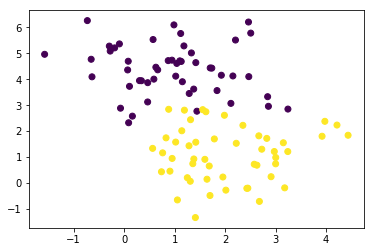

In [90]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [91]:
class CustomLogisticRegression:
    
    def __init__(self, lr=.5, iters=100):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.y = y.reshape(-1, 1)
        
        self.theta = np.zeros((self.X.shape[1], 1))
        
        for i in range(self.iters):
            self.gradient_asc()
    
    def gradient_asc(self):
        d_theta = self.gradient()
        self.theta += d_theta * self.lr
    
    def gradient(self):
        yh = CustomLogisticRegression.hypothesis(self.X, self.theta)
        d_theta = np.mean(( self.y - yh ) * self.X, axis=0).reshape(-1, 1)
        return d_theta
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        yh = CustomLogisticRegression.hypothesis(X, self.theta)
        return (yh > .5).astype(int)
    
    def score(self, X, y):
        yh = self.predict(X)
        return np.sum(yh == y.reshape(-1, 1)) / len(y)
        
        
    @classmethod
    def hypothesis(cls, X, theta):
        z = np.dot(X, theta)
        return 1 / (1 + np.exp(-z))
    

In [92]:
model = CustomLogisticRegression(iters=10000)

In [93]:
model.fit(X, y)

In [94]:
1 / (1 + np.exp(-z))

array([[4.53978687e-05],
       [3.35350130e-04],
       [2.47262316e-03],
       [1.79862100e-02],
       [1.19202922e-01],
       [5.00000000e-01],
       [8.80797078e-01],
       [9.82013790e-01],
       [9.97527377e-01],
       [9.99664650e-01],
       [9.99954602e-01]])

In [95]:
slop = -model.theta[1]/model.theta[2]
intercept = -model.theta[0]/model.theta[2]

x1 = np.linspace(-4, 6, 2)
x2 = x1 * slop + intercept

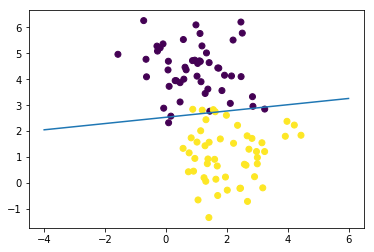

In [96]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot(x1, x2)

In [97]:
model.predict(X[:10])

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1]])

In [98]:
y[:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [99]:
model.score(X, y)

0.94

In [100]:
import pandas as pd

In [104]:
X = pd.read_csv("../datasets/chemical/Logistic_X_Train.csv").values
y = pd.read_csv("../datasets/chemical/Logistic_Y_Train.csv").values

X_test = pd.read_csv("../datasets/chemical/Logistic_X_Train.csv").values

In [105]:
model = CustomLogisticRegression(lr=.5, iters=10000)

In [106]:
model.fit(X, y)

In [112]:
y_out = model.predict(X_test)

In [113]:
y_out = y_out.flatten()

In [114]:
y_out

array([1, 1, 1, ..., 1, 0, 1])

In [116]:
df = pd.DataFrame.from_dict({"Outcome":y_out})

In [117]:
df.to_csv("out.csv", index=False)